In [114]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

### Görüntü Okuma ve Yazma

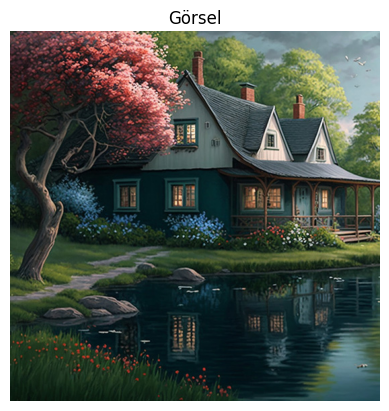

907500
uint8
(550, 550, 3)


In [118]:
import cv2
import matplotlib.pyplot as plt

picture1 = cv2.imread("/content/YD-00401.jpg")
plt.imshow(cv2.cvtColor(picture1, cv2.COLOR_BGR2RGB))
plt.title("Görsel")
plt.axis('off')
plt.show()

print(picture1.size)
print(picture1.dtype)
print(picture1.shape)

### Matris Oluşturma

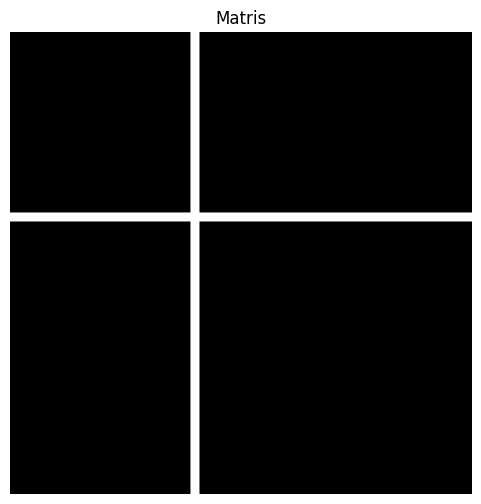

In [120]:
row = 256
col = 256
img = np.zeros((row, col))
img[100:105, :] = 0.5
img[:, 100:105] = 0.5
plt.figure(figsize=(6, 6))  # Görüntü boyutunu ayarlayın
plt.imshow(img, cmap='gray')  # Gri renk haritası kullanarak görselleştirme
plt.title("Matris")
plt.axis('off')  # Eksen işaretlerini kapatın
plt.show()

### İkili Görüntü

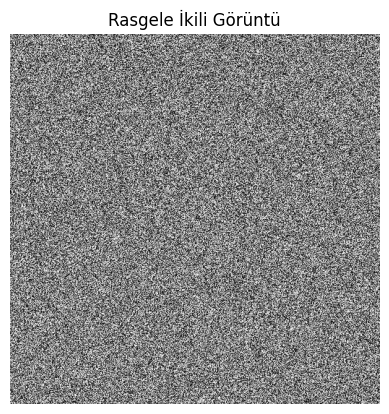

In [122]:
height = 512
width = 512
img = np.random.randint(255, size=(height, width, 1), dtype=np.uint8)

plt.imshow(img[:, :, 0], cmap='gray')  # Gri renk haritasıyla görselleştirme
plt.title("Rasgele İkili Görüntü")
plt.axis('off')  # Eksen işaretlerini kapatın
plt.show()

### Matrixlerde İndexleme

In [123]:
A=[[5,7,3],[-5,-7,3],[4,-6,9],[0,2,-9]]
print("A=", A)
print("A[1]=",A[1])
print("A[1][2]=",A[1][2])
print("A[0][-1]=",A[0][-1])

A= [[5, 7, 3], [-5, -7, 3], [4, -6, 9], [0, 2, -9]]
A[1]= [-5, -7, 3]
A[1][2]= 3
A[0][-1]= 3


### Histogram Denkleştirme

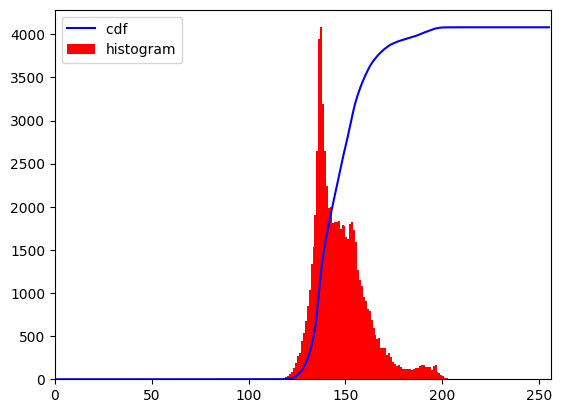

In [104]:
img = cv.imread ('/content/04OgX.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*(hist.max())/cdf.max()
plt.plot(cdf_normalized , color = 'b')
plt.hist(img.flatten (),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf ','histogram'), loc = 'upper left')
plt.show()

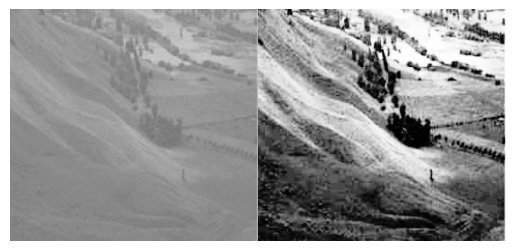

In [105]:
equ = cv.equalizeHist(img)
res = np.hstack((img,equ))
cv.imwrite('res.png',res)

res = cv.imread('res.png', cv.IMREAD_UNCHANGED)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()

### Görüntü Bulanıklaştırma

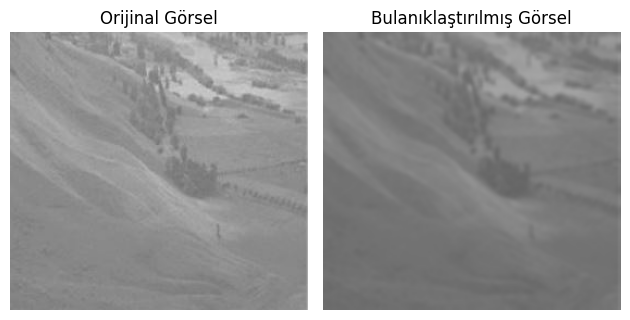

In [106]:
image = cv2.imread("/content/04OgX.jpg")

kernel1 = np.ones((5, 5), np.float32)/30

img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Orijinal Görsel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Bulanıklaştırılmış Görsel')
plt.axis('off')

plt.tight_layout()
plt.show()


### Yumuşatma Filtresi Maskesi

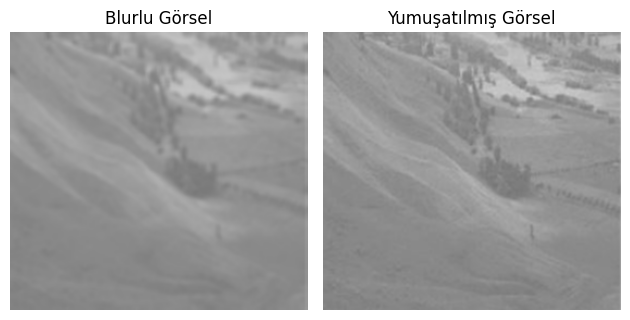

In [107]:
path = r'/content/04OgX.jpg'
img = cv2.imread(path)

im1 = cv2.blur(img, (5, 5))
im2 = cv2.boxFilter(img, -1, (2, 2), normalize=True)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
plt.title('Blurlu Görsel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.title('Yumuşatılmış Görsel')
plt.axis('off')

plt.tight_layout()
plt.show()

### Medyan Filtre

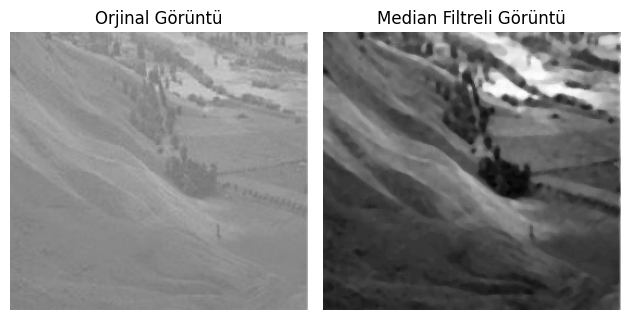

In [108]:
img = cv2.imread('/content/04OgX.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(gray, 5)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Orjinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median, cmap='gray')
plt.title('Median Filtreli Görüntü')
plt.axis('off')

plt.tight_layout()
plt.show()

### Gauss Gürültüsü

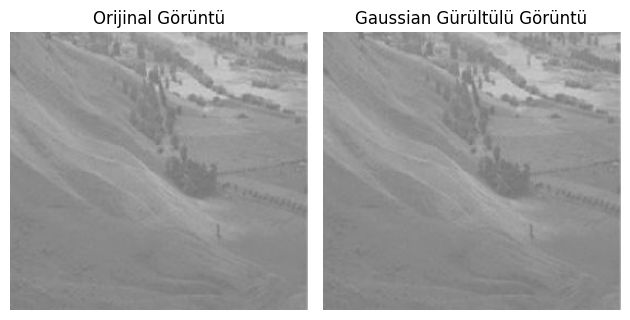

In [109]:
def gaussian_noise(image):
    row, col, ch = image.shape
    mean = 0
    var = 0.05
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return noisy

# Görüntüyü yükle
img = cv2.imread("/content/04OgX.jpg")
img = img / 255

img = np.uint8(img * 255)
noise_img = gaussian_noise(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noise_img)
plt.title('Gaussian Gürültülü Görüntü')
plt.axis('off')

plt.tight_layout()
plt.imshow(img)

### Renkli Görsel Örneği İle Tuz Biber Gürültüsü

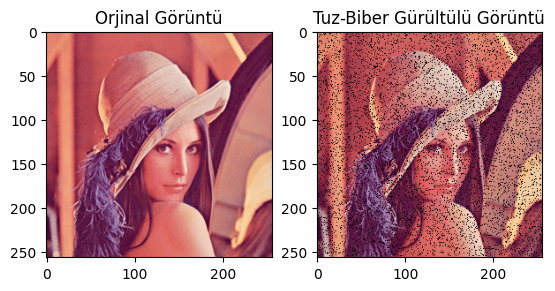

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def saltPepperNoise(image):
    row, col, ch = image.shape
    s_vs_p = 0.5
    amount = 0.04
    noisy = np.copy(image)
    num_salt = int(np.ceil(amount * image.size * s_vs_p))
    coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy[coords[0], coords[1], :] = 1  # Tuz noktalarını tüm renk kanallarına uygula

    num_pepper = int(np.ceil(amount * image.size * (1.0 - s_vs_p)))
    coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy[coords[0], coords[1], :] = 0  # Biber noktalarını tüm renk kanallarına uygula

    return noisy

img = cv2.imread("/content/Lena-Sondeberg-256x256-JPEG-image-77-Kbytes.ppm")
img = img / 255
img = np.uint8(img * 255)
noise_img = saltPepperNoise(img)

# Görüntüleri Matplotlib ile görselleştirme
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Orjinal Görüntü')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(noise_img, cv2.COLOR_BGR2RGB))
plt.title('Tuz-Biber Gürültülü Görüntü')

plt.show()


### Erozyon ve Genişleme

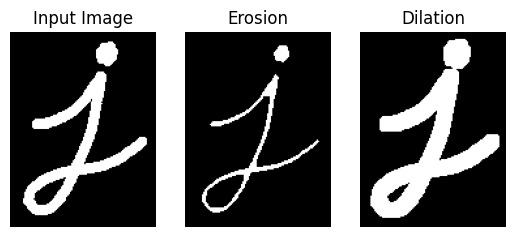

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/j.png", 0)
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(img_erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')

plt.show()


### Açma

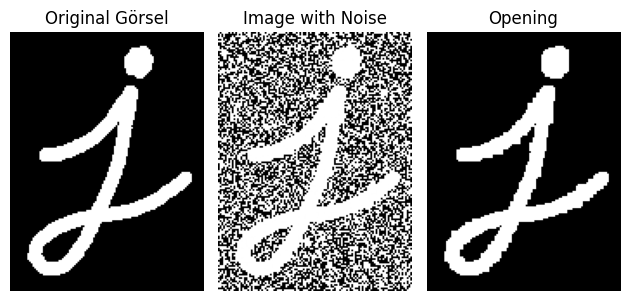

In [112]:
img = cv2.imread("/content/j.png", 0)
kernel = np.ones((5, 5), dtype=np.uint8)
whiteNoise = np.random.randint(0, 2, size=img.shape[:2])
whiteNoise = whiteNoise * 255
noise_img = whiteNoise + img
noise_img = noise_img.astype(np.uint8)
opening = cv2.morphologyEx(noise_img.astype(np.float32), cv2.MORPH_OPEN, kernel)

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Görsel')
plt.axis('off')

plt.subplot(132)
plt.imshow(noise_img, cmap='gray')
plt.title('Image with Noise')
plt.axis('off')

plt.subplot(133)
plt.imshow(opening, cmap='gray')
plt.title('Opening')
plt.axis('off')

plt.tight_layout()
plt.show()


### Kapama

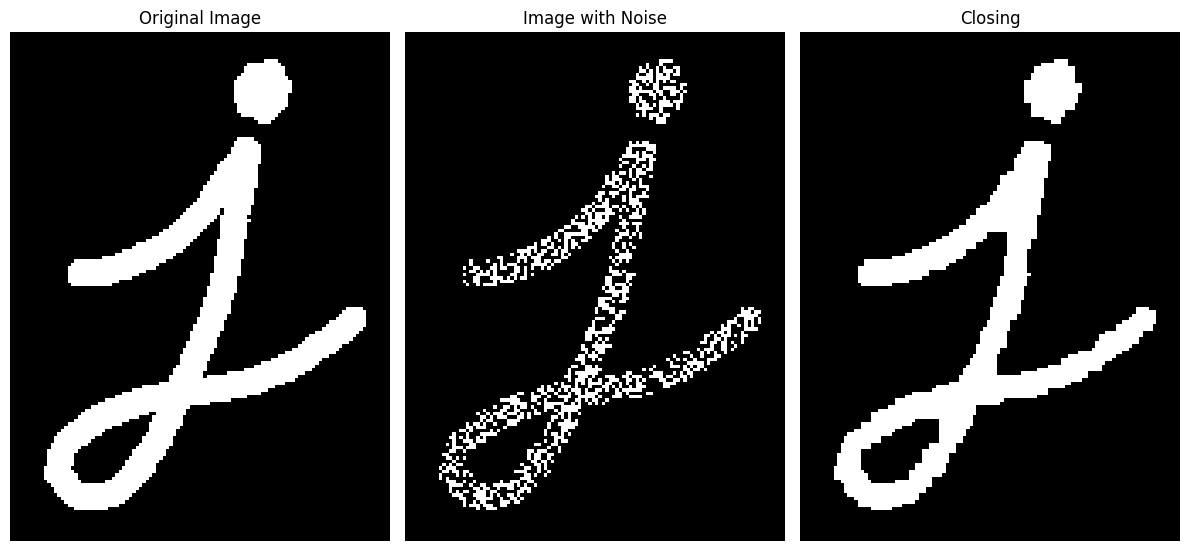

In [113]:
img = cv2.imread("/content/j.png", 0)
kernel = np.ones((5, 5), dtype=np.uint8)

blackNoise = np.random.randint(0, 2, size=img.shape[:2])
blackNoise = blackNoise * -255
noise_img = blackNoise + img
noise_img[noise_img <= -245] = 0
noise_img = noise_img.astype(np.uint8)

Closing = cv2.morphologyEx(noise_img.astype(np.float32), cv2.MORPH_CLOSE, kernel)

# Görüntüleri Matplotlib kullanarak görselleştirme
plt.figure(figsize=(12, 8))

plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(noise_img, cmap='gray')
plt.title('Image with Noise')
plt.axis('off')

plt.subplot(133)
plt.imshow(Closing, cmap='gray')
plt.title('Closing')
plt.axis('off')

plt.tight_layout()
plt.show()
